In [1]:
#Importing Libraries :
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Extracting DataFrame From Web :
import pandas_datareader as web

In [18]:
#Stock Symbol Used : Alphabet A Inc - > Google 
# From 1 April 2020 to 30 June 2020
#This data is full collection of all stock features from Google's Stock Market

def UpdateCSV(stock = 'GOOGL', update = True ):
    """
    stock  : (STR) Symbol of the stock. def "GOOGL"
    update : (BOOL) to update csv. def TRUE

    Updates DATA.csv at root by default
    returns stock info as well
    """
    df_g=web.DataReader(stock,data_source='yahoo',start='01-04-2020',end='30-06-2020')
    assert None == df_g.to_csv("DATA.csv")
    return df_g

# to test Func
if 1:
    UpdateCSV()

In [19]:
#The 'DATE' Column has already been parsed to dates , so that we can easily access it as a timestamp object.

# DEMO Reading the CSV
df_g = pd.read_csv("DATA.csv") # read csv
df_g["Date"] = pd.to_datetime(df_g["Date"]) # covert date from string
df_g = df_g.set_index("Date") # set date as index

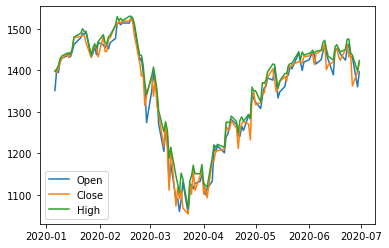

In [20]:
plt.plot(df_g.Open, label = "Open")
plt.plot(df_g.Close, label = "Close")
plt.plot(df_g.High, label = "High")
plt.legend()
plt.show()

In [21]:
df_g.describe()

,High,Low,Open,Close,Volume,Adj Close
count,123.000000,123.000000,123.000000,123.000000,1.230000e+02,123.000000
mean,1368.569510,1331.376507,1350.358207,1351.637484,2.312376e+06,1351.637484
std,119.736129,132.041262,126.019317,125.381132,9.910922e+05,125.381132
min,1066.910034,1008.869995,1056.369995,1054.130005,1.077500e+06,1054.130005
25%,1278.794983,1241.099976,1266.440002,1268.044983,1.565700e+06,1268.044983
50%,1413.670044,1376.550049,1394.979980,1397.170044,2.014300e+06,1397.170044
75%,1451.274963,1427.415039,1441.849976,1441.705017,2.757550e+06,1441.705017
max,1530.739990,1520.979980,1527.199951,1524.869995,5.417900e+06,1524.869995


In [22]:
df_g.shape  #Indicating Number Of days and features -> 123 days and 6 stock features

(123, 6)

In [23]:

def ConvToNpaArr(df):
    """
    Df : pd.DataFrame
    Converting to Array First for Model PreProcessing :
    """
    return df.values

In [24]:
#Importing MinMax Scaler :
from sklearn.preprocessing import MinMaxScaler

def NormalisingData(arr):
    """
    arr : arr to be scaled

    To Scale All The data points between  0 to 1

    """
    scaler=MinMaxScaler(feature_range=(0,1))
    scaled_data=scaler.fit_transform(arr)
    return scaled_data

[[0.71450735 0.66807915 0.6271054  0.73008468 0.29050318 0.73008468]
 [0.72567535 0.747281   0.73081579 0.72434887 0.14722145 0.72434887]
 [0.74367758 0.74937029 0.71883691 0.74544343 0.15855682 0.74544343]
 [0.7799626  0.78369877 0.77641631 0.77677708 0.13420422 0.77677708]
 [0.79345869 0.8020347  0.79243041 0.79625688 0.05423463 0.79625688]
 [0.80755876 0.81330185 0.80470667 0.81977319 0.10575062 0.81977319]
 [0.81003817 0.81798839 0.81479524 0.79971952 0.05213805 0.79971952]
 [0.8060497  0.82558445 0.79997039 0.81800984 0.         0.81800984]
 [0.82743668 0.84186994 0.82637044 0.84129251 0.05218413 0.84129251]
 [0.89179237 0.87418732 0.86266823 0.90366237 0.35565846 0.90366237]]


[]

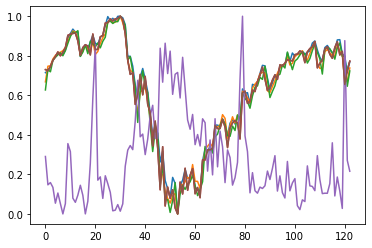

In [25]:
# convert the DataFrame to array and pass that for normalization

Scaled_data = NormalisingData( ConvToNpaArr( df_g ))
print(Scaled_data[:10]) # Displaying only top 10 
plt.plot(Scaled_data)
plt.plot()

In [26]:
train_ind = int(0.8*len(df_g)) # 20:80 split
train_scaled_data = Scaled_data[:train_ind] 
test_scaled_data = Scaled_data[train_ind:]

In [27]:
print("Size of Train set",len(train_scaled_data),"\nSize of Test set" , len(test_scaled_data)) 

Size of Train set 98 
Size of Test set 25


In [28]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True), 
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer='adam',
              metrics=["mse"])
history = model.fit(train_scaled_data,epochs=100)

Epoch 1/100


ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (None, 6)
